In [1]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [31]:
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    counter: int

In [32]:
def greeting_node(state: AgentState)-> AgentState:
    """Greeting Node which says hi to the person"""
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0
    return state

def random_node(state: AgentState) -> AgentState:
    """Generate a random number from 0 to 10"""
    state['numbers'].append(random.randint(0, 10))
    state['counter'] += 1
    return state
def should_continue(state: AgentState) -> AgentState:
    if state['counter'] < 5:
        print("ENTERING LOOP", state['counter'])
        return "loop"
    else:
        return "exit"

In [33]:
workflow = StateGraph(AgentState)

workflow.add_node('greetting', greeting_node)
workflow.add_node('random_node', random_node)
workflow.set_entry_point('greetting')
workflow.add_edge('greetting', "random_node")
workflow.add_conditional_edges("random_node",
                               should_continue,
                               {
                                   "loop": "random_node",
                                   "exit" :END
                               })
app = workflow.compile()


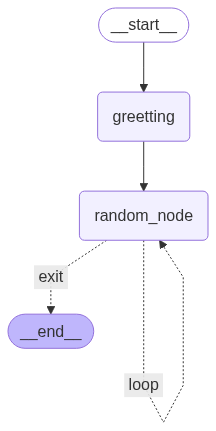

In [34]:
Image(app.get_graph().draw_mermaid_png())

In [35]:
app.invoke({"name": "Yurii", "numbers": [], "counter":-1})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Yurii', 'numbers': [4, 8, 2, 0, 3], 'counter': 5}

# Exercise

In [73]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attemtps: int
    lower_bound: int
    upper_bound: int
    number: int

In [74]:
def setup(state: AgentState) -> AgentState:
    state['player_name'] = f"Hi, {state['player_name']}"
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    state['number'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['attemtps'] = 0
    state['guesses'] = []
    print("I'm starting thinking for number from 1 - 20")
    return state

def guess(state: AgentState) -> AgentState:
    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        
        guess = random.randint(state["lower_bound"], state["upper_bound"])
    state["guesses"].append(guess)
    state["attemtps"] += 1
    return state

def get_hint(state: AgentState) -> AgentState:
    last_guess = state['guesses'][-1]
    target_number = state['number']
    if last_guess < target_number:
        state['lower_bound'] = last_guess
    elif last_guess > target_number:
        state['upper_bound'] = last_guess
    else:
        print(f"Success! Correct you found the number {target_number} in {state['attemtps']} attempts.")
    return state
    

In [75]:
def should_continue(state: AgentState) -> str:
    last_guess = state['guesses'][-1]
    target_number = state['number']
    if last_guess == target_number:
        print(f"YOU WON! Your number was {target_number} and you use {state['attemtps']} attempts")
        return "end"
    elif state['attemtps'] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {target_number}")
        return "end"
    else:
        print(f"CONTINU")
        print(f"CONTINUING: {state['attemtps']}/7 attempts used")
        return "continue"

In [76]:
workflow = StateGraph(AgentState)

workflow.add_node("setup", setup)
workflow.add_node('guess', guess)
workflow.add_node('hint_node', get_hint)
workflow.set_entry_point("setup")
workflow.add_edge("setup", "guess")
workflow.add_edge("guess", "hint_node")
workflow.add_conditional_edges("hint_node",
                               should_continue,
                               {
                                   "end": END,
                                   "continue": "guess"
                               })

app = workflow.compile()

In [89]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})
result

I'm starting thinking for number from 1 - 20
Success! Correct you found the number 11 in 1 attempts.
YOU WON! Your number was 11 and you use 1 attempts


{'player_name': 'Hi, Student',
 'guesses': [11],
 'attemtps': 1,
 'lower_bound': 1,
 'upper_bound': 20,
 'number': 11}